   Class  Density_Heavy  Density_Light  Grain_Large  Grain_Small  \
0      0            1.0            0.0          0.0          1.0   
1      0            1.0            0.0          1.0          0.0   
2      0            1.0            0.0          0.0          1.0   
3      0            0.0            1.0          1.0          0.0   
4      1            0.0            1.0          1.0          0.0   

   Hardness_Hard  Hardness_Soft  
0            1.0            0.0  
1            1.0            0.0  
2            1.0            0.0  
3            0.0            1.0  
4            1.0            0.0  
Accuracy: 1.0


[Text(0.5, 0.8333333333333334, 'Hardness_Hard <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = Oak'),
 Text(0.25, 0.5, 'Grain_Small <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]\nclass = Pine'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Oak'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Pine'),
 Text(0.75, 0.5, 'Density_Light <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Oak'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Oak'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Pine')]

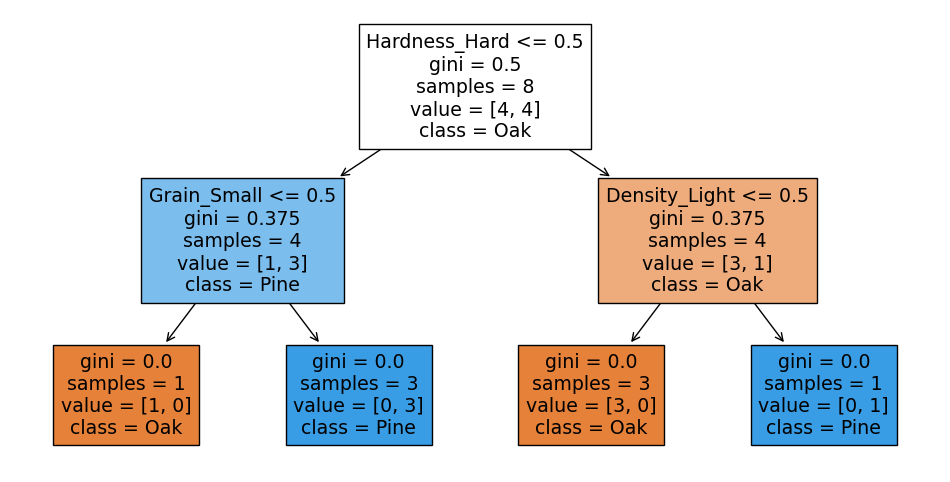

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

# Create the Play Tennis dataset
data = {
    'Density': ['Heavy',  
'Heavy',  
'Heavy',  
'Light',  
'Light',  
'Heavy',  
'Heavy',  
'Heavy'  
],
    'Grain': ['Small',  
'Large',  
'Small',  
'Large',  
'Large',  
'Small',  
'Small',  
'Small',  
],
    'Hardness': ['Hard',  
'Hard',  
'Hard',  
'Soft',  
'Hard',  
'Soft',  
'Soft',  
'Soft',  
],
    'Class': ['Oak',  
'Oak',  
'Oak',  
'Oak',  
'Pine',  
'Pine',  
'Pine',  
'Pine',  
]
}

df = pd.DataFrame(data)

# Encode the categorical variables
category_columns = ['Density', 'Grain', 'Hardness']

# One hot encode the categorical variables
# sparse_output=False will return a dataframe instead of a sparse matrix
# transform="pandas" will return a dataframe instead of a numpy array
enc= OneHotEncoder(sparse_output=False).set_output(transform="pandas")

one_hot_encoded = enc.fit_transform((df[category_columns]))
#print(one_hot_encoded)

# Drop the original categorical columns and replace them with the one hot encoded columns
df = pd.concat([df, one_hot_encoded], axis=1).drop(columns=category_columns)

""" 
# Another way to encode the input variables
df = pd.get_dummies(df, prefix=['Outlook'], columns = ['Outlook'], drop_first=True)
df = pd.get_dummies(df, prefix=['Temperature'], columns = ['Temperature'], drop_first=True)
df = pd.get_dummies(df, prefix=['Humidity'], columns = ['Humidity'], drop_first=True)
df = pd.get_dummies(df, prefix=['Wind'], columns = ['Wind'], drop_first=True) 
"""

# Encode the target variable
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])

# Print the preprocessed dataset
print(df.head())

# Split the dataset into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, random_state=42)

# Create the decision tree classifier
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X, y)

# Predict on the test set
y_pred = clf.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Plot the decision tree
plt.figure(figsize=(12,6))
plot_tree(clf, feature_names=X.columns, class_names=['Oak', 'Pine'], filled=True)
